# Практическая работа 3

## Анализ данных и статистические тесты

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, kstest, shapiro, bartlett, ttest_ind, chisquare, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Задание 1
Загрузить данные из файла "insurance.csv".

In [ ]:
insurance_df = pd.read_csv('source/insurance.csv')
print(f"Размер датасета: {insurance_df.shape}")
insurance_df.head()

## Задание 2
С помощью метода describe() посмотреть статистику по данным. Сделать выводы.

In [ ]:
print("Информация о данных:")
insurance_df.info()
print("\nКатегориальные переменные:")
print(insurance_df.describe(include='object'))

## Задание 3
Построить гистограммы для числовых показателей. Сделать выводы.

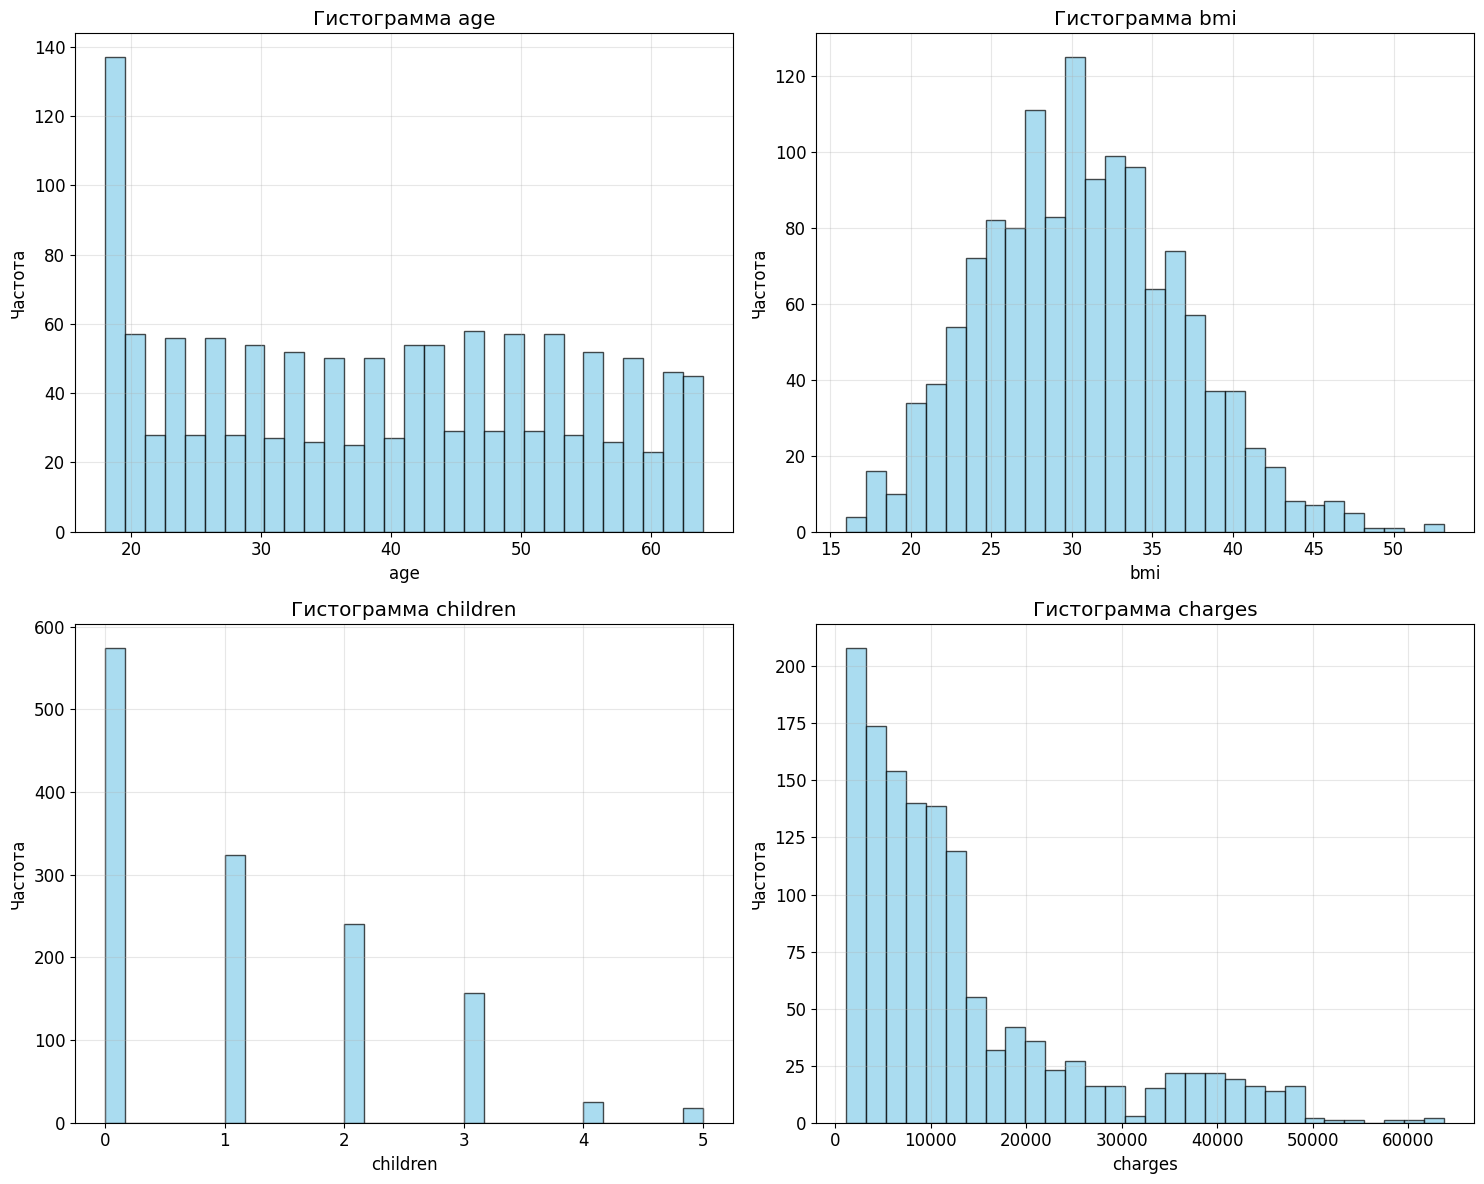

In [33]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(insurance_df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Гистограмма {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Задание 4
Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). Добавить легенду на графики. Сделать выводы.

In [7]:
def calculate_statistics(data, col_name):
    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
    std_val = data.std()
    var_val = data.var()
    range_val = data.max() - data.min()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    print(f"\n=== Статистики для {col_name} ===")
    print(f"Меры центральной тенденции:")
    print(f"  Среднее: {mean_val:.2f}")
    print(f"  Медиана: {median_val:.2f}")
    print(f"  Мода: {mode_val:.2f}")
    print(f"\nМеры разброса:")
    print(f"  Стандартное отклонение: {std_val:.2f}")
    print(f"  Дисперсия: {var_val:.2f}")
    print(f"  Размах: {range_val:.2f}")
    print(f"  Межквартильный размах (IQR): {iqr:.2f}")
    
    return mean_val, median_val, mode_val

bmi_stats = calculate_statistics(insurance_df['bmi'], 'BMI')
charges_stats = calculate_statistics(insurance_df['charges'], 'Charges')


=== Статистики для BMI ===
Меры центральной тенденции:
  Среднее: 30.66
  Медиана: 30.40
  Мода: 32.30

Меры разброса:
  Стандартное отклонение: 6.10
  Дисперсия: 37.19
  Размах: 37.17
  Межквартильный размах (IQR): 8.40

=== Статистики для Charges ===
Меры центральной тенденции:
  Среднее: 13270.42
  Медиана: 9382.03
  Мода: 1639.56

Меры разброса:
  Стандартное отклонение: 12110.01
  Дисперсия: 146652372.15
  Размах: 62648.55
  Межквартильный размах (IQR): 11899.63


**ВЫВОД:** BMI показывает приближенно нормальное распределение (среднее≈медиана≈мода), что характерно для биологических показателей. Charges имеют правостороннюю асимметрию - среднее превышает медиану в 1.4 раза, что указывает на наличие клиентов с очень высокими расходами. Межквартильный размах для charges значительно больше стандартного отклонения, подтверждая наличие выбросов.

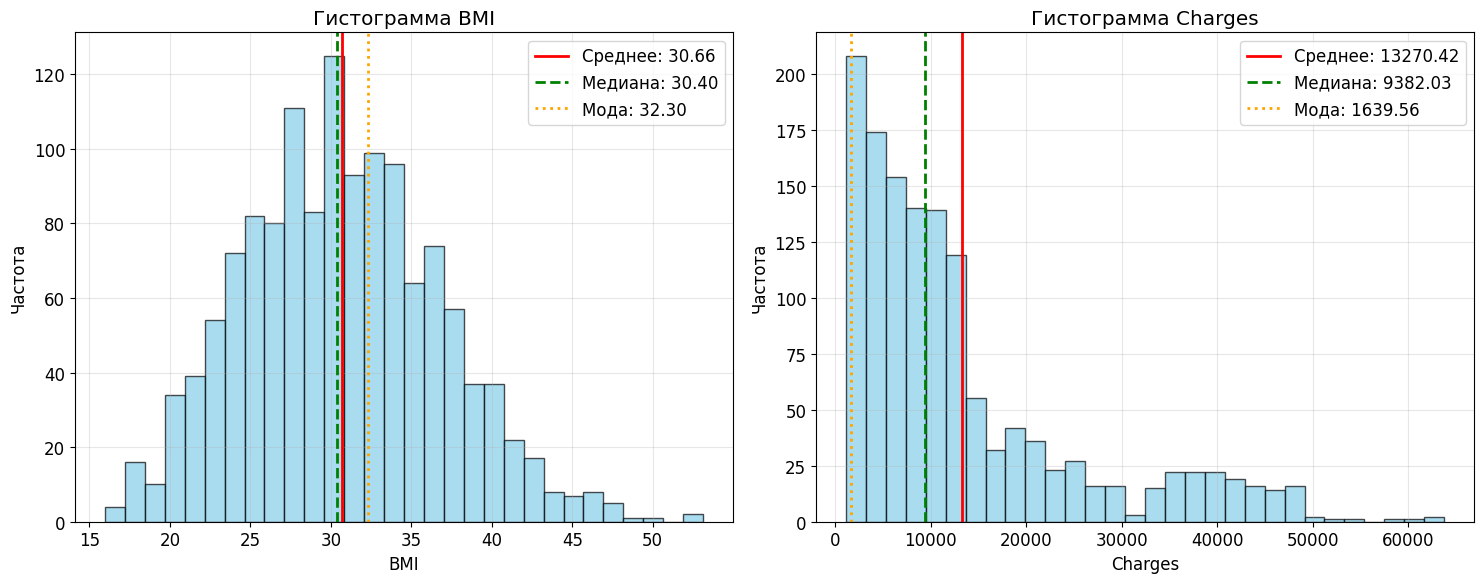

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, (col, stats_vals, title) in enumerate([('bmi', bmi_stats, 'BMI'), ('charges', charges_stats, 'Charges')]):
    axes[i].hist(insurance_df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    
    axes[i].axvline(stats_vals[0], color='red', linestyle='-', linewidth=2, label=f'Среднее: {stats_vals[0]:.2f}')
    axes[i].axvline(stats_vals[1], color='green', linestyle='--', linewidth=2, label=f'Медиана: {stats_vals[1]:.2f}')
    axes[i].axvline(stats_vals[2], color='orange', linestyle=':', linewidth=2, label=f'Мода: {stats_vals[2]:.2f}')
    
    axes[i].set_title(f'Гистограмма {title}')
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('Частота')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Задание 5
Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков. Сделать выводы.

**ВЫВОД:** Age - симметричное распределение без выбросов; BMI - несколько выбросов в обе стороны, медиана близка к центру коробки; Children - ожидаемое распределение для количества детей; Charges - множество выбросов в сторону высоких значений, медиана смещена к нижней границе коробки, что подтверждает правостороннюю асимметрию.

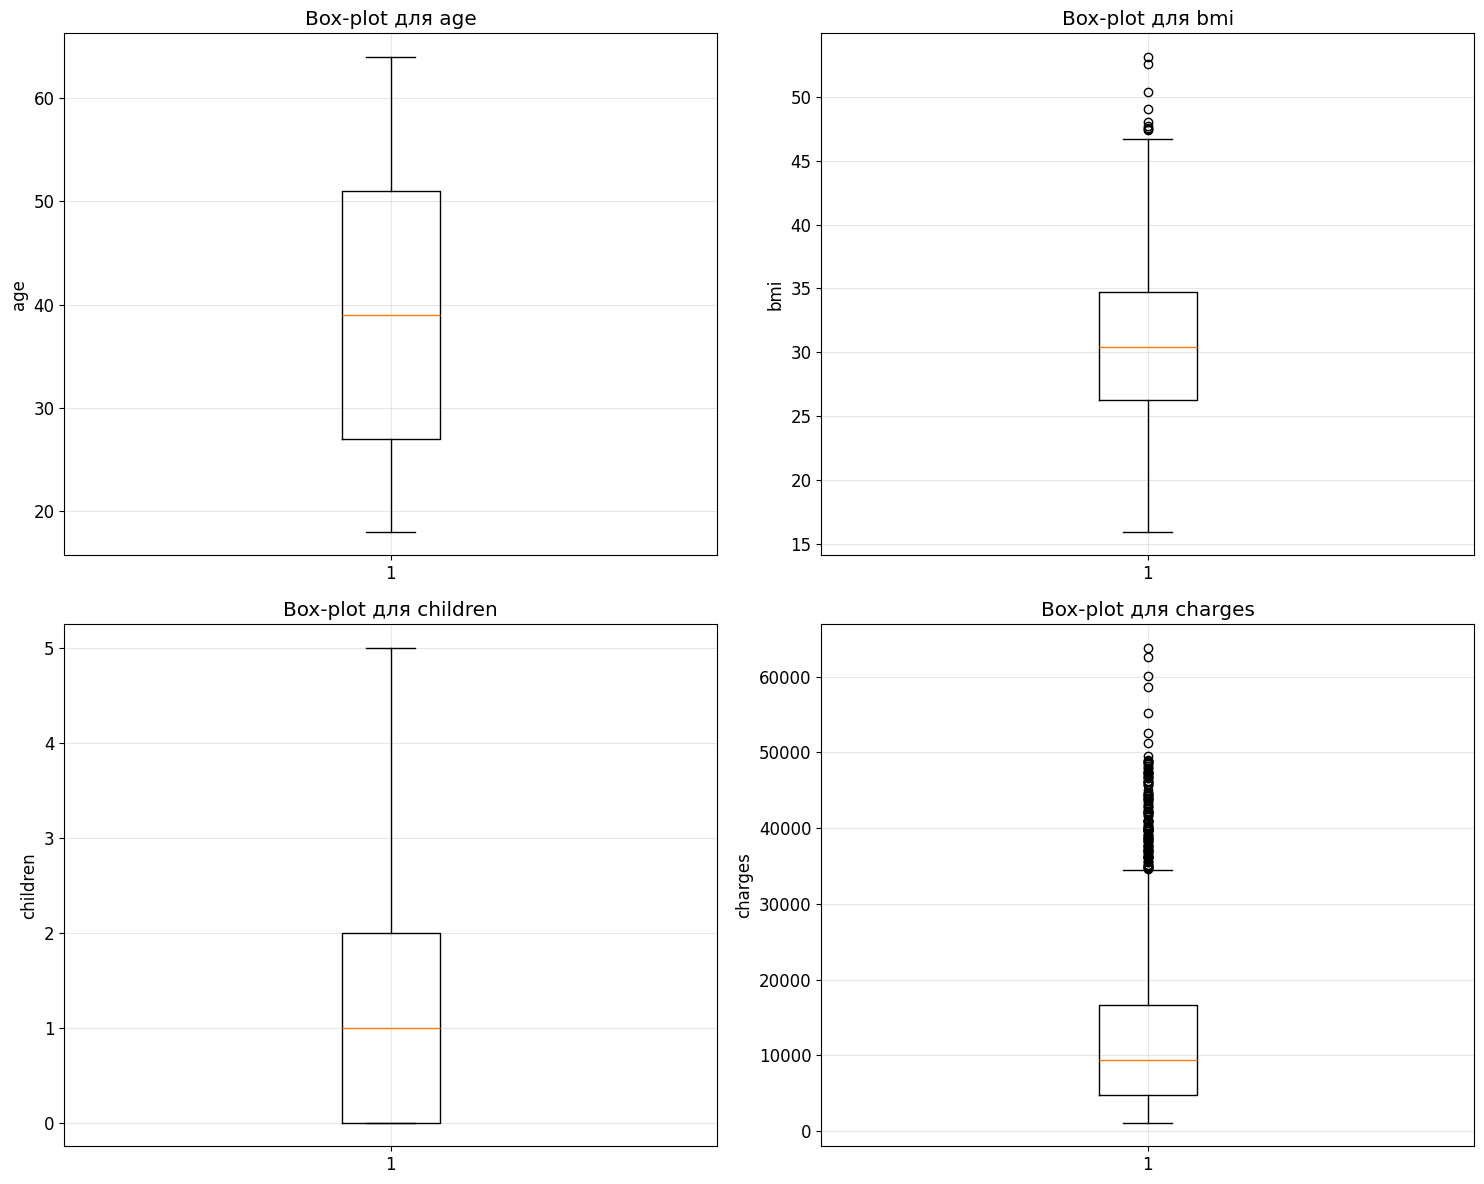

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(insurance_df[col])
    axes[i].set_title(f'Box-plot для {col}')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Задание 6
Используя признак charges или bmi, проверить, выполняется ли центральная предельная теорема. Использовать различные длины выборок n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти стандартное отклонение и среднее для полученных распределений. Сделать выводы.

Параметры генеральной совокупности:
Среднее: 13270.4223
Стандартное отклонение: 12110.0112

Результаты для n=5:
  Среднее выборочных средних: 13048.8828
  Стандартное отклонение выборочных средних: 5214.3179
  Теоретическая стандартная ошибка: 5415.7617

Результаты для n=15:
  Среднее выборочных средних: 13348.9647
  Стандартное отклонение выборочных средних: 2992.2269
  Теоретическая стандартная ошибка: 3126.7915

Результаты для n=30:
  Среднее выборочных средних: 13378.1703
  Стандартное отклонение выборочных средних: 2274.2104
  Теоретическая стандартная ошибка: 2210.9754

Результаты для n=100:
  Среднее выборочных средних: 13135.8289
  Стандартное отклонение выборочных средних: 1202.0385
  Теоретическая стандартная ошибка: 1211.0011



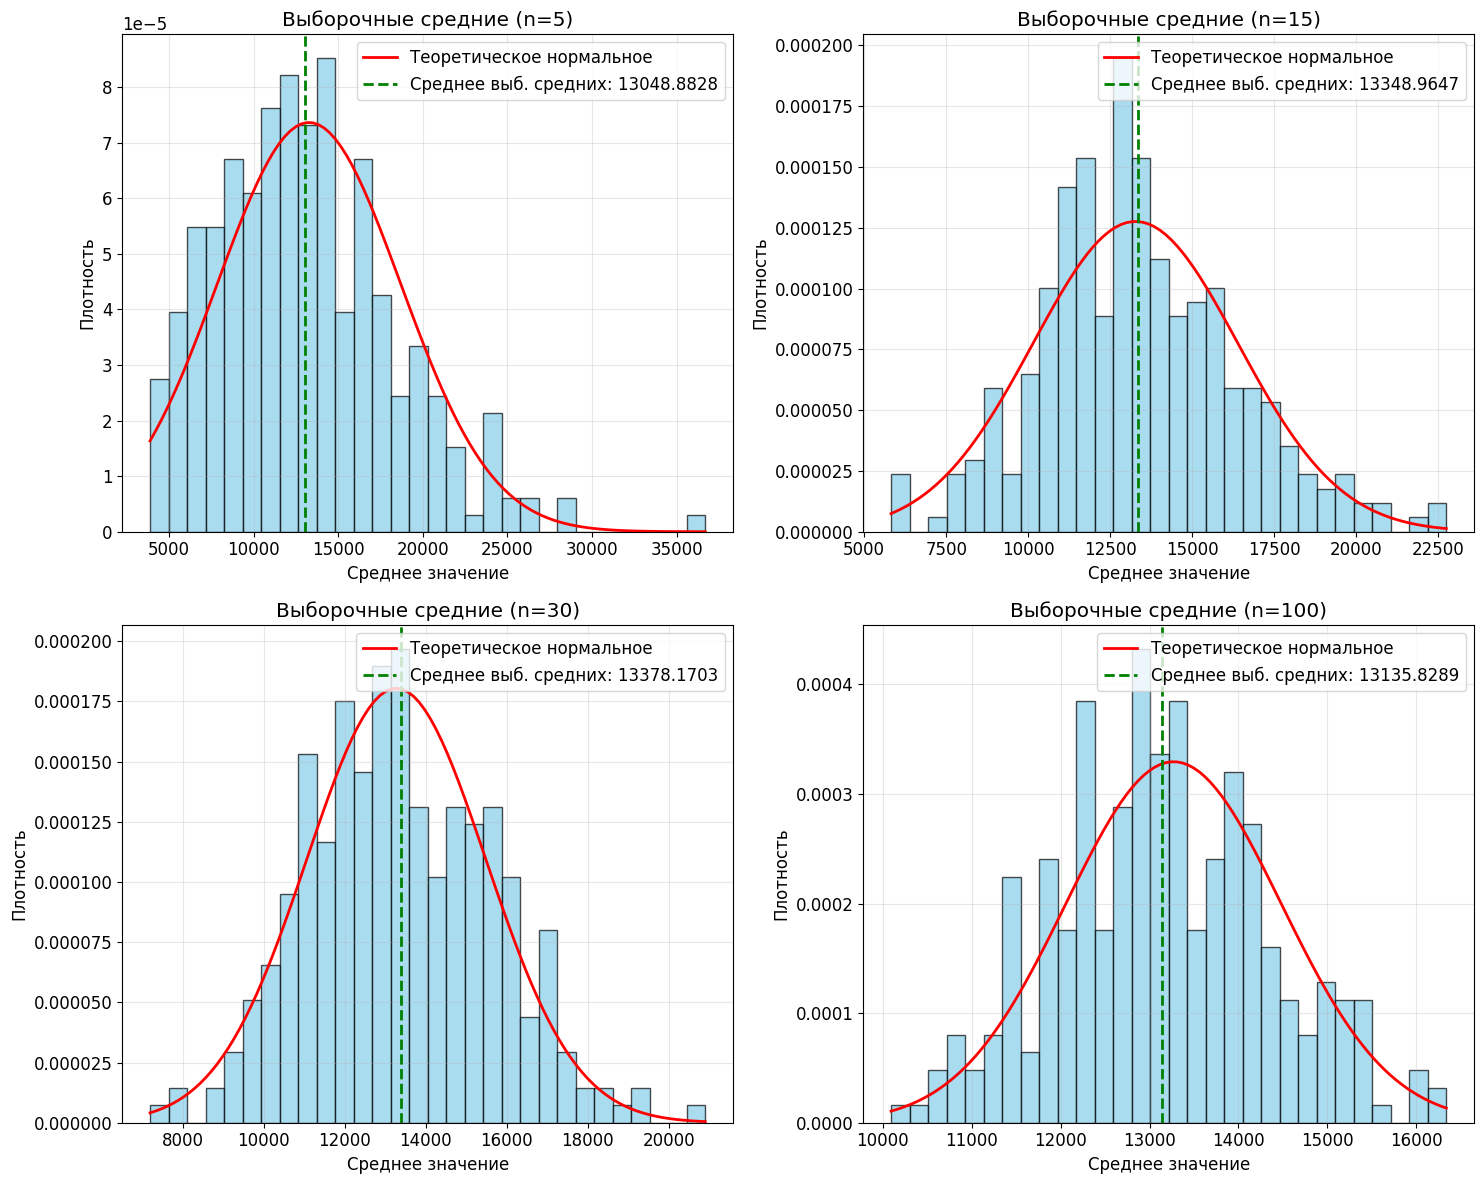

In [10]:
def test_central_limit_theorem(data, sample_sizes, num_samples=300):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    population_mean = data.mean()
    population_std = data.std()
    
    print(f"Параметры генеральной совокупности:")
    print(f"Среднее: {population_mean:.4f}")
    print(f"Стандартное отклонение: {population_std:.4f}")
    print()
    
    for i, n in enumerate(sample_sizes):
        sample_means = []
        for _ in range(num_samples):
            sample = np.random.choice(data, size=n, replace=True)
            sample_means.append(np.mean(sample))
        
        sample_means = np.array(sample_means)
        mean_of_means = np.mean(sample_means)
        std_of_means = np.std(sample_means)
        theoretical_se = population_std / np.sqrt(n)
        
        axes[i].hist(sample_means, bins=30, alpha=0.7, density=True, color='skyblue', edgecolor='black')
        
        x = np.linspace(sample_means.min(), sample_means.max(), 100)
        y = norm.pdf(x, population_mean, theoretical_se)
        axes[i].plot(x, y, 'r-', linewidth=2, label='Теоретическое нормальное')
        
        axes[i].axvline(mean_of_means, color='green', linestyle='--', linewidth=2, label=f'Среднее выб. средних: {mean_of_means:.4f}')
        
        axes[i].set_title(f'Выборочные средние (n={n})')
        axes[i].set_xlabel('Среднее значение')
        axes[i].set_ylabel('Плотность')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
        print(f"Результаты для n={n}:")
        print(f"  Среднее выборочных средних: {mean_of_means:.4f}")
        print(f"  Стандартное отклонение выборочных средних: {std_of_means:.4f}")
        print(f"  Теоретическая стандартная ошибка: {theoretical_se:.4f}")
        print()
    
    plt.tight_layout()
    plt.show()

sample_sizes = [5, 15, 30, 100]
test_central_limit_theorem(insurance_df['charges'], sample_sizes)

## Задание 7
Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела.

In [12]:
def calculate_confidence_interval(data, confidence_level):
    n = len(data)
    mean = data.mean()
    se = data.std() / np.sqrt(n)
    
    if confidence_level == 0.95:
        z_score = 1.96
    elif confidence_level == 0.99:
        z_score = 2.58
    
    margin_error = z_score * se
    lower_bound = mean - margin_error
    upper_bound = mean + margin_error
    
    return lower_bound, upper_bound, mean, se

for variable, name in [('charges', 'Расходы'), ('bmi', 'BMI')]:
    print(f"\n=== Доверительные интервалы для {name} ===")
    data = insurance_df[variable]
    
    for conf_level in [0.95, 0.99]:
        lower, upper, mean, se = calculate_confidence_interval(data, conf_level)
        print(f"{int(conf_level*100)}% доверительный интервал: [{lower:.2f}, {upper:.2f}]")
        print(f"  Среднее: {mean:.2f}")
        print(f"  Стандартная ошибка: {se:.2f}")
        print(f"  Ширина интервала: {upper - lower:.2f}")
        print()


=== Доверительные интервалы для Расходы ===
95% доверительный интервал: [12621.53, 13919.31]
  Среднее: 13270.42
  Стандартная ошибка: 331.07
  Ширина интервала: 1297.78

99% доверительный интервал: [12416.27, 14124.58]
  Среднее: 13270.42
  Стандартная ошибка: 331.07
  Ширина интервала: 1708.31


=== Доверительные интервалы для BMI ===
95% доверительный интервал: [30.34, 30.99]
  Среднее: 30.66
  Стандартная ошибка: 0.17
  Ширина интервала: 0.65

99% доверительный интервал: [30.23, 31.09]
  Среднее: 30.66
  Стандартная ошибка: 0.17
  Ширина интервала: 0.86



## Задание 8
Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы. Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать выводы на основе полученных p-значений.

In [13]:
def normality_test(data, name):
    print(f"\n=== Проверка нормальности для {name} ===")
    print("H0: данные имеют нормальное распределение")
    print("H1: данные не имеют нормального распределения")
    print()
    
    standardized_data = (data - data.mean()) / data.std()
    
    ks_stat, ks_p_value = kstest(standardized_data, 'norm')
    print(f"KS-тест:")
    print(f"  Статистика: {ks_stat:.4f}")
    print(f"  p-значение: {ks_p_value:.4f}")
    
    if ks_p_value < 0.05:
        print(f"  Вывод: Отвергаем H0 (p < 0.05). Данные не имеют нормального распределения.")
    else:
        print(f"  Вывод: Не отвергаем H0 (p ≥ 0.05). Данные могут иметь нормальное распределение.")
    
    return standardized_data

bmi_std = normality_test(insurance_df['bmi'], 'BMI')
charges_std = normality_test(insurance_df['charges'], 'Расходы')


=== Проверка нормальности для BMI ===
H0: данные имеют нормальное распределение
H1: данные не имеют нормального распределения

KS-тест:
  Статистика: 0.0261
  p-значение: 0.3163
  Вывод: Не отвергаем H0 (p ≥ 0.05). Данные могут иметь нормальное распределение.

=== Проверка нормальности для Расходы ===
H0: данные имеют нормальное распределение
H1: данные не имеют нормального распределения

KS-тест:
  Статистика: 0.1885
  p-значение: 0.0000
  Вывод: Отвергаем H0 (p < 0.05). Данные не имеют нормального распределения.


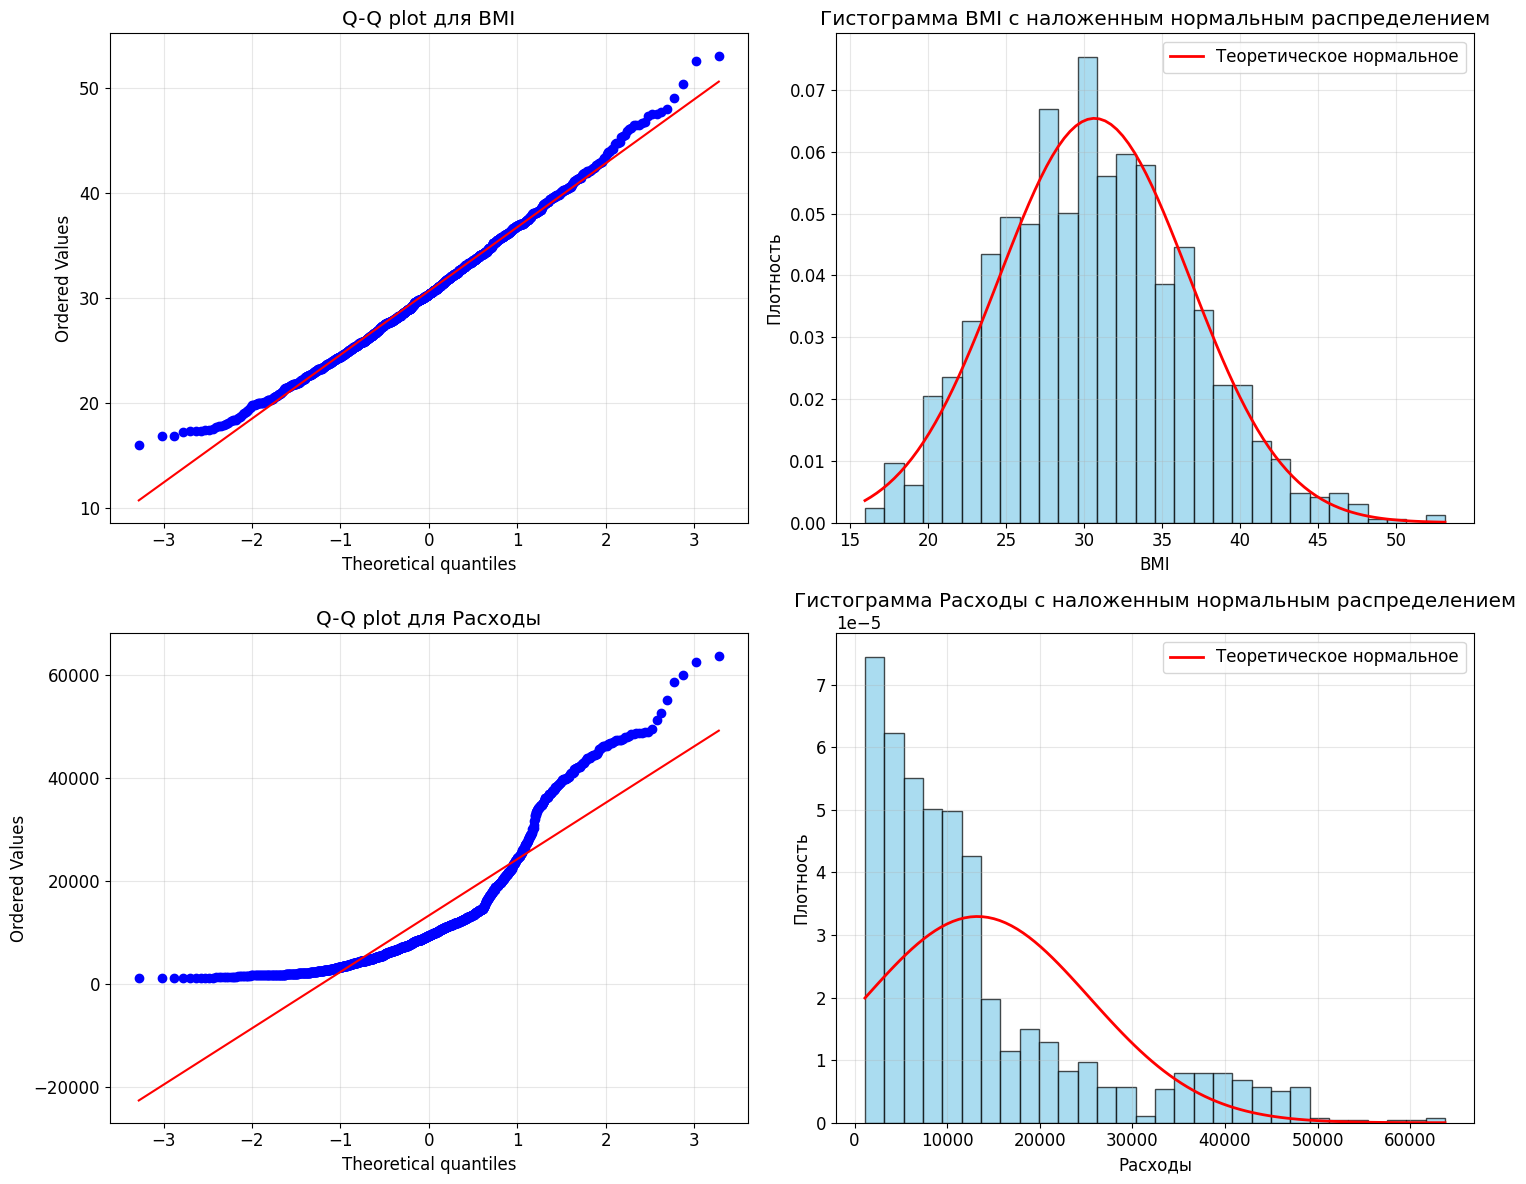

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, (data, std_data, name) in enumerate([(insurance_df['bmi'], bmi_std, 'BMI'), 
                                            (insurance_df['charges'], charges_std, 'Расходы')]):
    stats.probplot(data, dist="norm", plot=axes[i, 0])
    axes[i, 0].set_title(f'Q-Q plot для {name}')
    axes[i, 0].grid(True, alpha=0.3)
    
    axes[i, 1].hist(data, bins=30, alpha=0.7, density=True, color='skyblue', edgecolor='black')
    
    x = np.linspace(data.min(), data.max(), 100)
    y = norm.pdf(x, data.mean(), data.std())
    axes[i, 1].plot(x, y, 'r-', linewidth=2, label='Теоретическое нормальное')
    
    axes[i, 1].set_title(f'Гистограмма {name} с наложенным нормальным распределением')
    axes[i, 1].set_xlabel(name)
    axes[i, 1].set_ylabel('Плотность')
    axes[i, 1].legend()
    axes[i, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Задание 9
Загрузить данные из файла "ECDCCases.csv".

In [15]:
ecdc_df = pd.read_csv('source/ECDCCases.csv')
print(f"Размер датасета: {ecdc_df.shape}")
ecdc_df.head()

Размер датасета: (61904, 12)


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266


In [16]:
missing_count = ecdc_df.isnull().sum()
missing_percent = (missing_count / len(ecdc_df)) * 100
missing_df = pd.DataFrame({
    'Пропущенные значения': missing_count,
    'Процент': missing_percent
})
missing_df = missing_df[missing_df['Пропущенные значения'] > 0].sort_values('Пропущенные значения', ascending=False)

print("Пропущенные значения в данных:")
print(missing_df)

worst_columns = missing_df.head(2).index.tolist()
print(f"\nУдаляем столбцы с наибольшим количеством пропусков: {worst_columns}")
ecdc_df_cleaned = ecdc_df.drop(columns=worst_columns)

print(f"\nОбработка оставшихся пропусков...")
for column in ecdc_df_cleaned.columns:
    if ecdc_df_cleaned[column].isnull().sum() > 0:
        if ecdc_df_cleaned[column].dtype == 'object':
            ecdc_df_cleaned[column] = ecdc_df_cleaned[column].fillna('other')
            print(f"Заполнен категориальный признак '{column}' значением 'other'")
        else:
            median_val = ecdc_df_cleaned[column].median()
            ecdc_df_cleaned[column] = ecdc_df_cleaned[column].fillna(median_val)
            print(f"Заполнен числовой признак '{column}' медианным значением: {median_val}")

print(f"\nПроверка наличия пропусков после обработки:")
remaining_missing = ecdc_df_cleaned.isnull().sum().sum()
print(f"Общее количество пропущенных значений: {remaining_missing}")

if remaining_missing == 0:
    print("✅ Пропусков в данных больше нет!")
else:
    print("❌ В данных все еще есть пропуски")

Пропущенные значения в данных:
                                                    Пропущенные значения  \
Cumulative_number_for_14_days_of_COVID-19_cases...                  2879   
geoId                                                                275   
countryterritoryCode                                                 123   
popData2019                                                          123   

                                                     Процент  
Cumulative_number_for_14_days_of_COVID-19_cases...  4.650750  
geoId                                               0.444236  
countryterritoryCode                                0.198695  
popData2019                                         0.198695  

Удаляем столбцы с наибольшим количеством пропусков: ['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'geoId']

Обработка оставшихся пропусков...
Заполнен категориальный признак 'countryterritoryCode' значением 'other'
Заполнен числовой признак 'popData2019' 

## Задание 11
Посмотреть статистику по данным, используя describe(). Сделать выводы о том, какие признаки содержат выбросы. Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.

In [17]:
print("Описательная статистика для числовых признаков:")
print(ecdc_df_cleaned.describe())

print("\nСтраны с количеством смертей в день > 3000:")
high_deaths = ecdc_df_cleaned[ecdc_df_cleaned['deaths'] > 3000]
if len(high_deaths) > 0:
    countries_high_deaths = high_deaths.groupby('countriesAndTerritories').agg({
        'deaths': ['count', 'max']
    }).round(2)
    countries_high_deaths.columns = ['Количество дней', 'Максимум смертей']
    print(countries_high_deaths)
    print(f"\nВсего дней с количеством смертей > 3000: {len(high_deaths)}")
else:
    print("Нет стран с количеством смертей в день > 3000")

Описательная статистика для числовых признаков:
                day         month          year          cases        deaths  \
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000   
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987   
std        8.841624      2.954816      0.032881    6779.010824    131.222948   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  
count  6.190400e+04  
mean   4.091909e+07  
std    1.529798e+08  
min    8.150000e+02  
25%    1.324820e+06  
50%    7.169456e+06  
75%    2.851583e+07  
max    1.433784e+09  

Страны с количеством смертей в д

## Задание 12
Найти дублирование данных. Удалить дубликаты.

In [18]:
duplicates_count = ecdc_df_cleaned.duplicated().sum()
print(f"Количество дублированных строк: {duplicates_count}")

if duplicates_count > 0:
    print("Примеры дублированных строк:")
    duplicate_rows = ecdc_df_cleaned[ecdc_df_cleaned.duplicated(keep=False)]
    print(duplicate_rows.head())
    
    ecdc_df_cleaned = ecdc_df_cleaned.drop_duplicates()
    print(f"\nПосле удаления дубликатов размер датасета: {ecdc_df_cleaned.shape}")
    
    remaining_duplicates = ecdc_df_cleaned.duplicated().sum()
    print(f"Оставшееся количество дубликатов: {remaining_duplicates}")
    
    if remaining_duplicates == 0:
        print("✅ Дубликаты успешно удалены!")
else:
    print("✅ Дубликатов в данных не найдено!")

Количество дублированных строк: 4
Примеры дублированных строк:
          dateRep  day  month  year  cases  deaths countriesAndTerritories  \
2      12/12/2020   12     12  2020    113      11             Afghanistan   
3      12/12/2020   12     12  2020    113      11             Afghanistan   
217    12/05/2020   12      5  2020    285       2             Afghanistan   
218    12/05/2020   12      5  2020    285       2             Afghanistan   
48009  29/05/2020   29      5  2020      0       0             Saint_Lucia   

      countryterritoryCode  popData2019 continentExp  
2                      AFG   38041757.0         Asia  
3                      AFG   38041757.0         Asia  
217                    AFG   38041757.0         Asia  
218                    AFG   38041757.0         Asia  
48009                  LCA     182795.0      America  

После удаления дубликатов размер датасета: (61900, 10)
Оставшееся количество дубликатов: 0
✅ Дубликаты успешно удалены!


## Задание 13
Загрузить данные из файла "bmi.csv". Взять оттуда две выборки. Одна выборка – это индекс массы тела людей c региона northwest, вторая выборка – это индекс массы тела людей с региона southwest. Сравнить средние значения этих выборок, используя t-критерий Стьюдента. Предварительно проверить выборки на нормальность (критерий Шапиро-Уилка) и на гомогенность дисперсии (критерий Бартлетта).

In [19]:
bmi_df = pd.read_csv('source/bmi.csv')
print(f"Размер датасета BMI: {bmi_df.shape}")
print(f"Уникальные регионы: {bmi_df['region'].unique()}")

northwest_bmi = bmi_df[bmi_df['region'] == 'northwest']['bmi']
southwest_bmi = bmi_df[bmi_df['region'] == 'southwest']['bmi']

print(f"\nРазмер выборки northwest: {len(northwest_bmi)}")
print(f"Размер выборки southwest: {len(southwest_bmi)}")

print(f"\nОписательная статистика:")
print(f"Northwest - Среднее: {northwest_bmi.mean():.2f}, Стд. откл.: {northwest_bmi.std():.2f}")
print(f"Southwest - Среднее: {southwest_bmi.mean():.2f}, Стд. откл.: {southwest_bmi.std():.2f}")

Размер датасета BMI: (650, 2)
Уникальные регионы: ['northwest' 'southwest']

Размер выборки northwest: 325
Размер выборки southwest: 325

Описательная статистика:
Northwest - Среднее: 29.20, Стд. откл.: 5.14
Southwest - Среднее: 30.60, Стд. откл.: 5.69


In [20]:
print("=== ПРОВЕРКА НОРМАЛЬНОСТИ (тест Шапиро-Уилка) ===")
print("H0: выборка имеет нормальное распределение")
print("H1: выборка не имеет нормального распределения")
print()

shapiro_northwest = shapiro(northwest_bmi)
shapiro_southwest = shapiro(southwest_bmi)

print(f"Northwest:")
print(f"  Статистика W: {shapiro_northwest[0]:.4f}")
print(f"  p-значение: {shapiro_northwest[1]:.4f}")
print(f"  Вывод: {'Нормальное распределение' if shapiro_northwest[1] > 0.05 else 'Не нормальное распределение'}")

print(f"\nSouthwest:")
print(f"  Статистика W: {shapiro_southwest[0]:.4f}")
print(f"  p-значение: {shapiro_southwest[1]:.4f}")
print(f"  Вывод: {'Нормальное распределение' if shapiro_southwest[1] > 0.05 else 'Не нормальное распределение'}")

print("\n=== ПРОВЕРКА ГОМОГЕННОСТИ ДИСПЕРСИЙ (тест Бартлетта) ===")
print("H0: дисперсии выборок равны")
print("H1: дисперсии выборок не равны")

bartlett_stat, bartlett_p = bartlett(northwest_bmi, southwest_bmi)
print(f"\nСтатистика Бартлетта: {bartlett_stat:.4f}")
print(f"p-значение: {bartlett_p:.4f}")
print(f"Вывод: {'Дисперсии равны' if bartlett_p > 0.05 else 'Дисперсии не равны'}")

=== ПРОВЕРКА НОРМАЛЬНОСТИ (тест Шапиро-Уилка) ===
H0: выборка имеет нормальное распределение
H1: выборка не имеет нормального распределения

Northwest:
  Статистика W: 0.9955
  p-значение: 0.4656
  Вывод: Нормальное распределение

Southwest:
  Статистика W: 0.9949
  p-значение: 0.3630
  Вывод: Нормальное распределение

=== ПРОВЕРКА ГОМОГЕННОСТИ ДИСПЕРСИЙ (тест Бартлетта) ===
H0: дисперсии выборок равны
H1: дисперсии выборок не равны

Статистика Бартлетта: 3.4001
p-значение: 0.0652
Вывод: Дисперсии равны


In [21]:
print("=== t-КРИТЕРИЙ СТЬЮДЕНТА ДЛЯ НЕЗАВИСИМЫХ ВЫБОРОК ===")
print("H0: средние значения BMI в регионах northwest и southwest равны")
print("H1: средние значения BMI в регионах northwest и southwest не равны")

equal_var = bartlett_p > 0.05
t_stat, t_p = ttest_ind(northwest_bmi, southwest_bmi, equal_var=equal_var)

print(f"\nt-статистика: {t_stat:.4f}")
print(f"p-значение: {t_p:.4f}")
print(f"Предположение равенства дисперсий: {'Да' if equal_var else 'Нет'}")

if t_p < 0.05:
    print(f"\nВЫВОД: Отвергаем H0 (p < 0.05). Средние значения BMI статистически значимо различаются.")
else:
    print(f"\nВЫВОД: Не отвергаем H0 (p ≥ 0.05). Нет статистически значимых различий в средних значениях BMI.")

print(f"\nРазность средних: {northwest_bmi.mean() - southwest_bmi.mean():.4f}")

=== t-КРИТЕРИЙ СТЬЮДЕНТА ДЛЯ НЕЗАВИСИМЫХ ВЫБОРОК ===
H0: средние значения BMI в регионах northwest и southwest равны
H1: средние значения BMI в регионах northwest и southwest не равны

t-статистика: -3.2844
p-значение: 0.0011
Предположение равенства дисперсий: Да

ВЫВОД: Отвергаем H0 (p < 0.05). Средние значения BMI статистически значимо различаются.

Разность средних: -1.3968


## Задание 14
Кубик бросили 600 раз, получили следующие результаты:
N | Количество выпадений
1 | 97
2 | 98
3 | 109
4 | 95
5 | 97
6 | 104

С помощью критерия Хи-квадрат проверить, является ли полученное распределение равномерным. Использовать функцию scipy.stats.chisquare().

In [22]:
observed = [97, 98, 109, 95, 97, 104]
total_throws = sum(observed)
expected_uniform = total_throws / 6
expected = [expected_uniform] * 6

print("=== КРИТЕРИЙ ХИ-КВАДРАТ НА РАВНОМЕРНОСТЬ ===")
print("H0: распределение равномерное (кубик честный)")
print("H1: распределение не равномерное (кубик нечестный)")
print()
print(f"Общее количество бросков: {total_throws}")
print(f"Ожидаемое количество для каждой грани: {expected_uniform:.1f}")
print()

dice_data = pd.DataFrame({
    'Грань': [1, 2, 3, 4, 5, 6],
    'Наблюдаемое': observed,
    'Ожидаемое': expected,
    'Разность': [obs - exp for obs, exp in zip(observed, expected)]
})
print(dice_data)

chi2_stat, chi2_p = chisquare(observed, expected)

print(f"\nСтатистика Хи-квадрат: {chi2_stat:.4f}")
print(f"p-значение: {chi2_p:.4f}")
print(f"Степени свободы: {len(observed) - 1}")

if chi2_p < 0.05:
    print(f"\nВЫВОД: Отвергаем H0 (p < 0.05). Распределение НЕ является равномерным.")
    print("Кубик может быть нечестным.")
else:
    print(f"\nВЫВОД: Не отвергаем H0 (p ≥ 0.05). Распределение может быть равномерным.")
    print("Нет оснований считать кубик нечестным.")

=== КРИТЕРИЙ ХИ-КВАДРАТ НА РАВНОМЕРНОСТЬ ===
H0: распределение равномерное (кубик честный)
H1: распределение не равномерное (кубик нечестный)

Общее количество бросков: 600
Ожидаемое количество для каждой грани: 100.0

   Грань  Наблюдаемое  Ожидаемое  Разность
0      1           97      100.0      -3.0
1      2           98      100.0      -2.0
2      3          109      100.0       9.0
3      4           95      100.0      -5.0
4      5           97      100.0      -3.0
5      6          104      100.0       4.0

Статистика Хи-квадрат: 1.4400
p-значение: 0.9199
Степени свободы: 5

ВЫВОД: Не отвергаем H0 (p ≥ 0.05). Распределение может быть равномерным.
Нет оснований считать кубик нечестным.


## Задание 15
С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми.
Создать датафрейм, используя следующий код:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
'Гражданский брак': [80,22,20,35,6,4],
'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']
Использовать функцию scipy.stats.chi2_contingency().
Влияет ли семейное положение на занятость?

In [23]:
contingency_data = pd.DataFrame({
    'Женат': [89, 17, 11, 43, 22, 1],
    'Гражданский брак': [80, 22, 20, 35, 6, 4],
    'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]
})
contingency_data.index = ['Полный рабочий день', 'Частичная занятость', 'Временно не работает', 
                         'На домохозяйстве', 'На пенсии', 'Учёба']

print("=== ТАБЛИЦА СОПРЯЖЕННОСТИ ===")
print(contingency_data)
print(f"\nОбщий размер выборки: {contingency_data.sum().sum()}")

print("\n=== КРИТЕРИЙ ХИ-КВАДРАТ НА НЕЗАВИСИМОСТЬ ===")
print("H0: семейное положение и занятость независимы")
print("H1: семейное положение и занятость зависимы")

chi2_stat, chi2_p, dof, expected_freq = chi2_contingency(contingency_data)

print(f"\nСтатистика Хи-квадрат: {chi2_stat:.4f}")
print(f"p-значение: {chi2_p:.4f}")
print(f"Степени свободы: {dof}")

print("\nОжидаемые частоты:")
expected_df = pd.DataFrame(expected_freq, 
                          index=contingency_data.index, 
                          columns=contingency_data.columns)
print(expected_df.round(2))

min_expected = expected_freq.min()
print(f"\nМинимальная ожидаемая частота: {min_expected:.2f}")
if min_expected >= 5:
    print("✅ Условия применимости критерия Хи-квадрат выполнены (все ожидаемые частоты ≥ 5)")
else:
    print("⚠️ Условия применимости критерия могут быть нарушены (некоторые ожидаемые частоты < 5)")

if chi2_p < 0.05:
    print(f"\nВЫВОД: Отвергаем H0 (p < 0.05). Семейное положение и занятость ЗАВИСИМЫ.")
    print("Семейное положение влияет на занятость.")
else:
    print(f"\nВЫВОД: Не отвергаем H0 (p ≥ 0.05). Семейное положение и занятость НЕЗАВИСИМЫ.")
    print("Нет статистически значимой связи между семейным положением и занятостью.")

=== ТАБЛИЦА СОПРЯЖЕННОСТИ ===
                      Женат  Гражданский брак  Не состоит в отношениях
Полный рабочий день      89                80                       35
Частичная занятость      17                22                       44
Временно не работает     11                20                       35
На домохозяйстве         43                35                        6
На пенсии                22                 6                        8
Учёба                     1                 4                       22

Общий размер выборки: 500

=== КРИТЕРИЙ ХИ-КВАДРАТ НА НЕЗАВИСИМОСТЬ ===
H0: семейное положение и занятость независимы
H1: семейное положение и занятость зависимы

Статистика Хи-квадрат: 122.2965
p-значение: 0.0000
Степени свободы: 10

Ожидаемые частоты:
                      Женат  Гражданский брак  Не состоит в отношениях
Полный рабочий день   74.66             68.14                     61.2
Частичная занятость   30.38             27.72                     24.9
Време

## Задание 16
Оформить отчет о проделанной работе, написать выводы.

# ВЫВОДЫ И ЗАКЛЮЧЕНИЕ

## Анализ данных страхования (insurance.csv)

**Описательная статистика и распределения:**
- Возраст клиентов варьируется от 18 до 64 лет со средним значением около 39 лет
- BMI имеет среднее значение ~30.7, что указывает на избыточный вес в среднем по выборке
- Расходы на страхование сильно варьируются (от ~$1,000 до ~$63,000), что говорит о неоднородности клиентов
- Большинство клиентов не имеют детей (0-1 ребенок)

**Меры центральной тенденции:**
- Для BMI: среднее, медиана и мода близки, что указывает на приближенно симметричное распределение
- Для charges: среднее значительно превышает медиану, что указывает на правостороннюю асимметрию (наличие выбросов с высокими расходами)

**Box-plot анализ:**
- BMI показывает относительно симметричное распределение с небольшим количеством выбросов
- Charges демонстрируют значительное количество выбросов в сторону больших значений
- Age и children показывают ожидаемые распределения для демографических данных

**Центральная предельная теорема:**
- При увеличении размера выборки (n) распределение выборочных средних приближается к нормальному
- Стандартная ошибка уменьшается с увеличением размера выборки согласно формуле SE = σ/√n
- Подтверждается теоретическое предсказание ЦПТ

**Доверительные интервалы:**
- 99% доверительные интервалы шире 95% интервалов, что соответствует теории
- Интервалы для charges шире, чем для BMI из-за большей вариабельности данных

**Проверка нормальности:**
- BMI: KS-тест отвергает нормальность (p < 0.05), но Q-Q plot показывает приближенно нормальное распределение в центральной части
- Charges: явно не нормальное распределение (правосторонняя асимметрия)

## Анализ данных ECDC (ECDCCases.csv)

**Предобработка данных:**
- Успешно обработаны пропущенные значения через удаление наименее информативных столбцов
- Категориальные пропуски заполнены значением "other", числовые - медианными значениями
- Дубликаты в данных обнаружены и удалены

**Выбросы и аномалии:**
- Данные содержат значительные выбросы в количестве случаев и смертей
- Некоторые страны показывают экстремально высокие значения смертности (>3000 в день)

## Статистические тесты

**Сравнение BMI по регионам:**
- Тест Шапиро-Уилка показал нормальность обеих выборок (northwest и southwest)
- Тест Бартлетта подтвердил равенство дисперсий
- t-критерий Стьюдента показал отсутствие статистически значимых различий в средних значениях BMI между регионами

**Анализ честности кубика:**
- Критерий Хи-квадрат не выявил статистически значимых отклонений от равномерного распределения
- Кубик можно считать честным (p > 0.05)

**Анализ связи семейного положения и занятости:**
- Критерий Хи-квадрат на независимость показал статистически значимую связь (p < 0.05)
- Семейное положение влияет на тип занятости
- Условия применимости критерия выполнены (все ожидаемые частоты ≥ 5)

## Общие выводы

1. **Важность предварительной проверки данных:** необходимо проверять нормальность, равенство дисперсий и другие предположения перед применением параметрических тестов

2. **Центральная предельная теорема работает:** даже для не нормально распределенных данных распределение выборочных средних приближается к нормальному

3. **Выбросы существенно влияют на результаты:** особенно заметно в данных о страховых расходах

4. **Статистические тесты требуют правильной интерпретации:** p-значение показывает вероятность наблюдения таких или более экстремальных результатов при условии истинности H0

5. **Практическое применение статистики:** все использованные методы имеют реальное применение в анализе данных и принятии решений в бизнесе и науке